In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

https://www.kaggle.com/arindam235/startup-investments-crunchbase

In [2]:
investments_df = pd.read_csv("investments_VC.csv", encoding ='latin1')
investments_df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
investments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
permalink               49438 non-null object
name                    49437 non-null object
homepage_url            45989 non-null object
category_list           45477 non-null object
 market                 45470 non-null object
 funding_total_usd      49438 non-null object
status                  48124 non-null object
country_code            44165 non-null object
state_code              30161 non-null object
region                  44165 non-null object
city                    43322 non-null object
funding_rounds          49438 non-null float64
founded_at              38554 non-null object
founded_month           38482 non-null object
founded_quarter         38482 non-null object
founded_year            38482 non-null float64
first_funding_at        49438 non-null object
last_funding_at         49438 non-null object
seed                    49438 non-null float64
venture       

In [4]:
investments_df.isnull().sum()*100/investments_df.isnull().count()

permalink                8.943898
name                     8.945740
homepage_url            15.296350
category_list           16.239363
 market                 16.252256
 funding_total_usd       8.943898
status                  11.364055
country_code            18.655837
state_code              44.448742
region                  18.655837
city                    20.208494
funding_rounds           8.943898
founded_at              28.990312
founded_month           29.122923
founded_quarter         29.122923
founded_year            29.122923
first_funding_at         8.943898
last_funding_at          8.943898
seed                     8.943898
venture                  8.943898
equity_crowdfunding      8.943898
undisclosed              8.943898
convertible_note         8.943898
debt_financing           8.943898
angel                    8.943898
grant                    8.943898
private_equity           8.943898
post_ipo_equity          8.943898
post_ipo_debt            8.943898
secondary_mark

In [5]:
investments_df['funding_total_usd']  = investments_df[' funding_total_usd ']

In [6]:
investments_df.drop(' funding_total_usd ', axis = 1, inplace = True)

In [7]:
investments_df['market'] = investments_df[' market ']
investments_df.drop(' market ', axis = 1, inplace = True)

In [8]:
investments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
permalink               49438 non-null object
name                    49437 non-null object
homepage_url            45989 non-null object
category_list           45477 non-null object
status                  48124 non-null object
country_code            44165 non-null object
state_code              30161 non-null object
region                  44165 non-null object
city                    43322 non-null object
funding_rounds          49438 non-null float64
founded_at              38554 non-null object
founded_month           38482 non-null object
founded_quarter         38482 non-null object
founded_year            38482 non-null float64
first_funding_at        49438 non-null object
last_funding_at         49438 non-null object
seed                    49438 non-null float64
venture                 49438 non-null float64
equity_crowdfunding     49438 non-null float64
undisclosed 

### It appears that the 4856 rows at the bottom of the dataset are missing, dropping all those rows that have missing values

In [9]:
investments_df1 = investments_df.copy()

In [10]:
investments_df.drop([49439,54293], axis =0, inplace = True)

In [11]:
54294-49438

4856

In [12]:
in_df = investments_df.iloc[49439:54293]

In [13]:
## creating a dataset by removing the missing values at the bottom of the dataset
in_df1 = investments_df.copy()
investments_df = in_df1.iloc[0:49438]

In [14]:
investments_df.isnull().sum()*100/investments_df.isnull().count()

permalink                0.000000
name                     0.002023
homepage_url             6.976415
category_list            8.012056
status                   2.657875
country_code            10.665885
state_code              38.992273
region                  10.665885
city                    12.371051
funding_rounds           0.000000
founded_at              22.015454
founded_month           22.161091
founded_quarter         22.161091
founded_year            22.161091
first_funding_at         0.000000
last_funding_at          0.000000
seed                     0.000000
venture                  0.000000
equity_crowdfunding      0.000000
undisclosed              0.000000
convertible_note         0.000000
debt_financing           0.000000
angel                    0.000000
grant                    0.000000
private_equity           0.000000
post_ipo_equity          0.000000
post_ipo_debt            0.000000
secondary_market         0.000000
product_crowdfunding     0.000000
round_A       

In [15]:
investments_df['round_A'].value_counts()

0.0           40435
5000000.0       525
3000000.0       378
2000000.0       372
10000000.0      324
              ...  
2498400.0         1
755700.0          1
6570000.0         1
1904761.0         1
4969429.0         1
Name: round_A, Length: 2035, dtype: int64

In [16]:
investments_df['status'].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

In [17]:
investments_df['funding_total_usd'] = investments_df['funding_total_usd'].str.replace(',', '')
investments_df['funding_total_usd'] = investments_df['funding_total_usd'].str.replace('-', 'Nan')
investments_df['funding_total_usd'] = investments_df['funding_total_usd'].astype('float')

In [18]:
numeric_data = investments_df.select_dtypes(include = ['float', 'int'])
categorical_data = investments_df.select_dtypes(include =['object'])
numeric_data.drop('founded_year', axis =1, inplace = True)
numeric_data.head()
numeric_corr = numeric_data.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]), <a list of 23 Text yticklabel objects>)

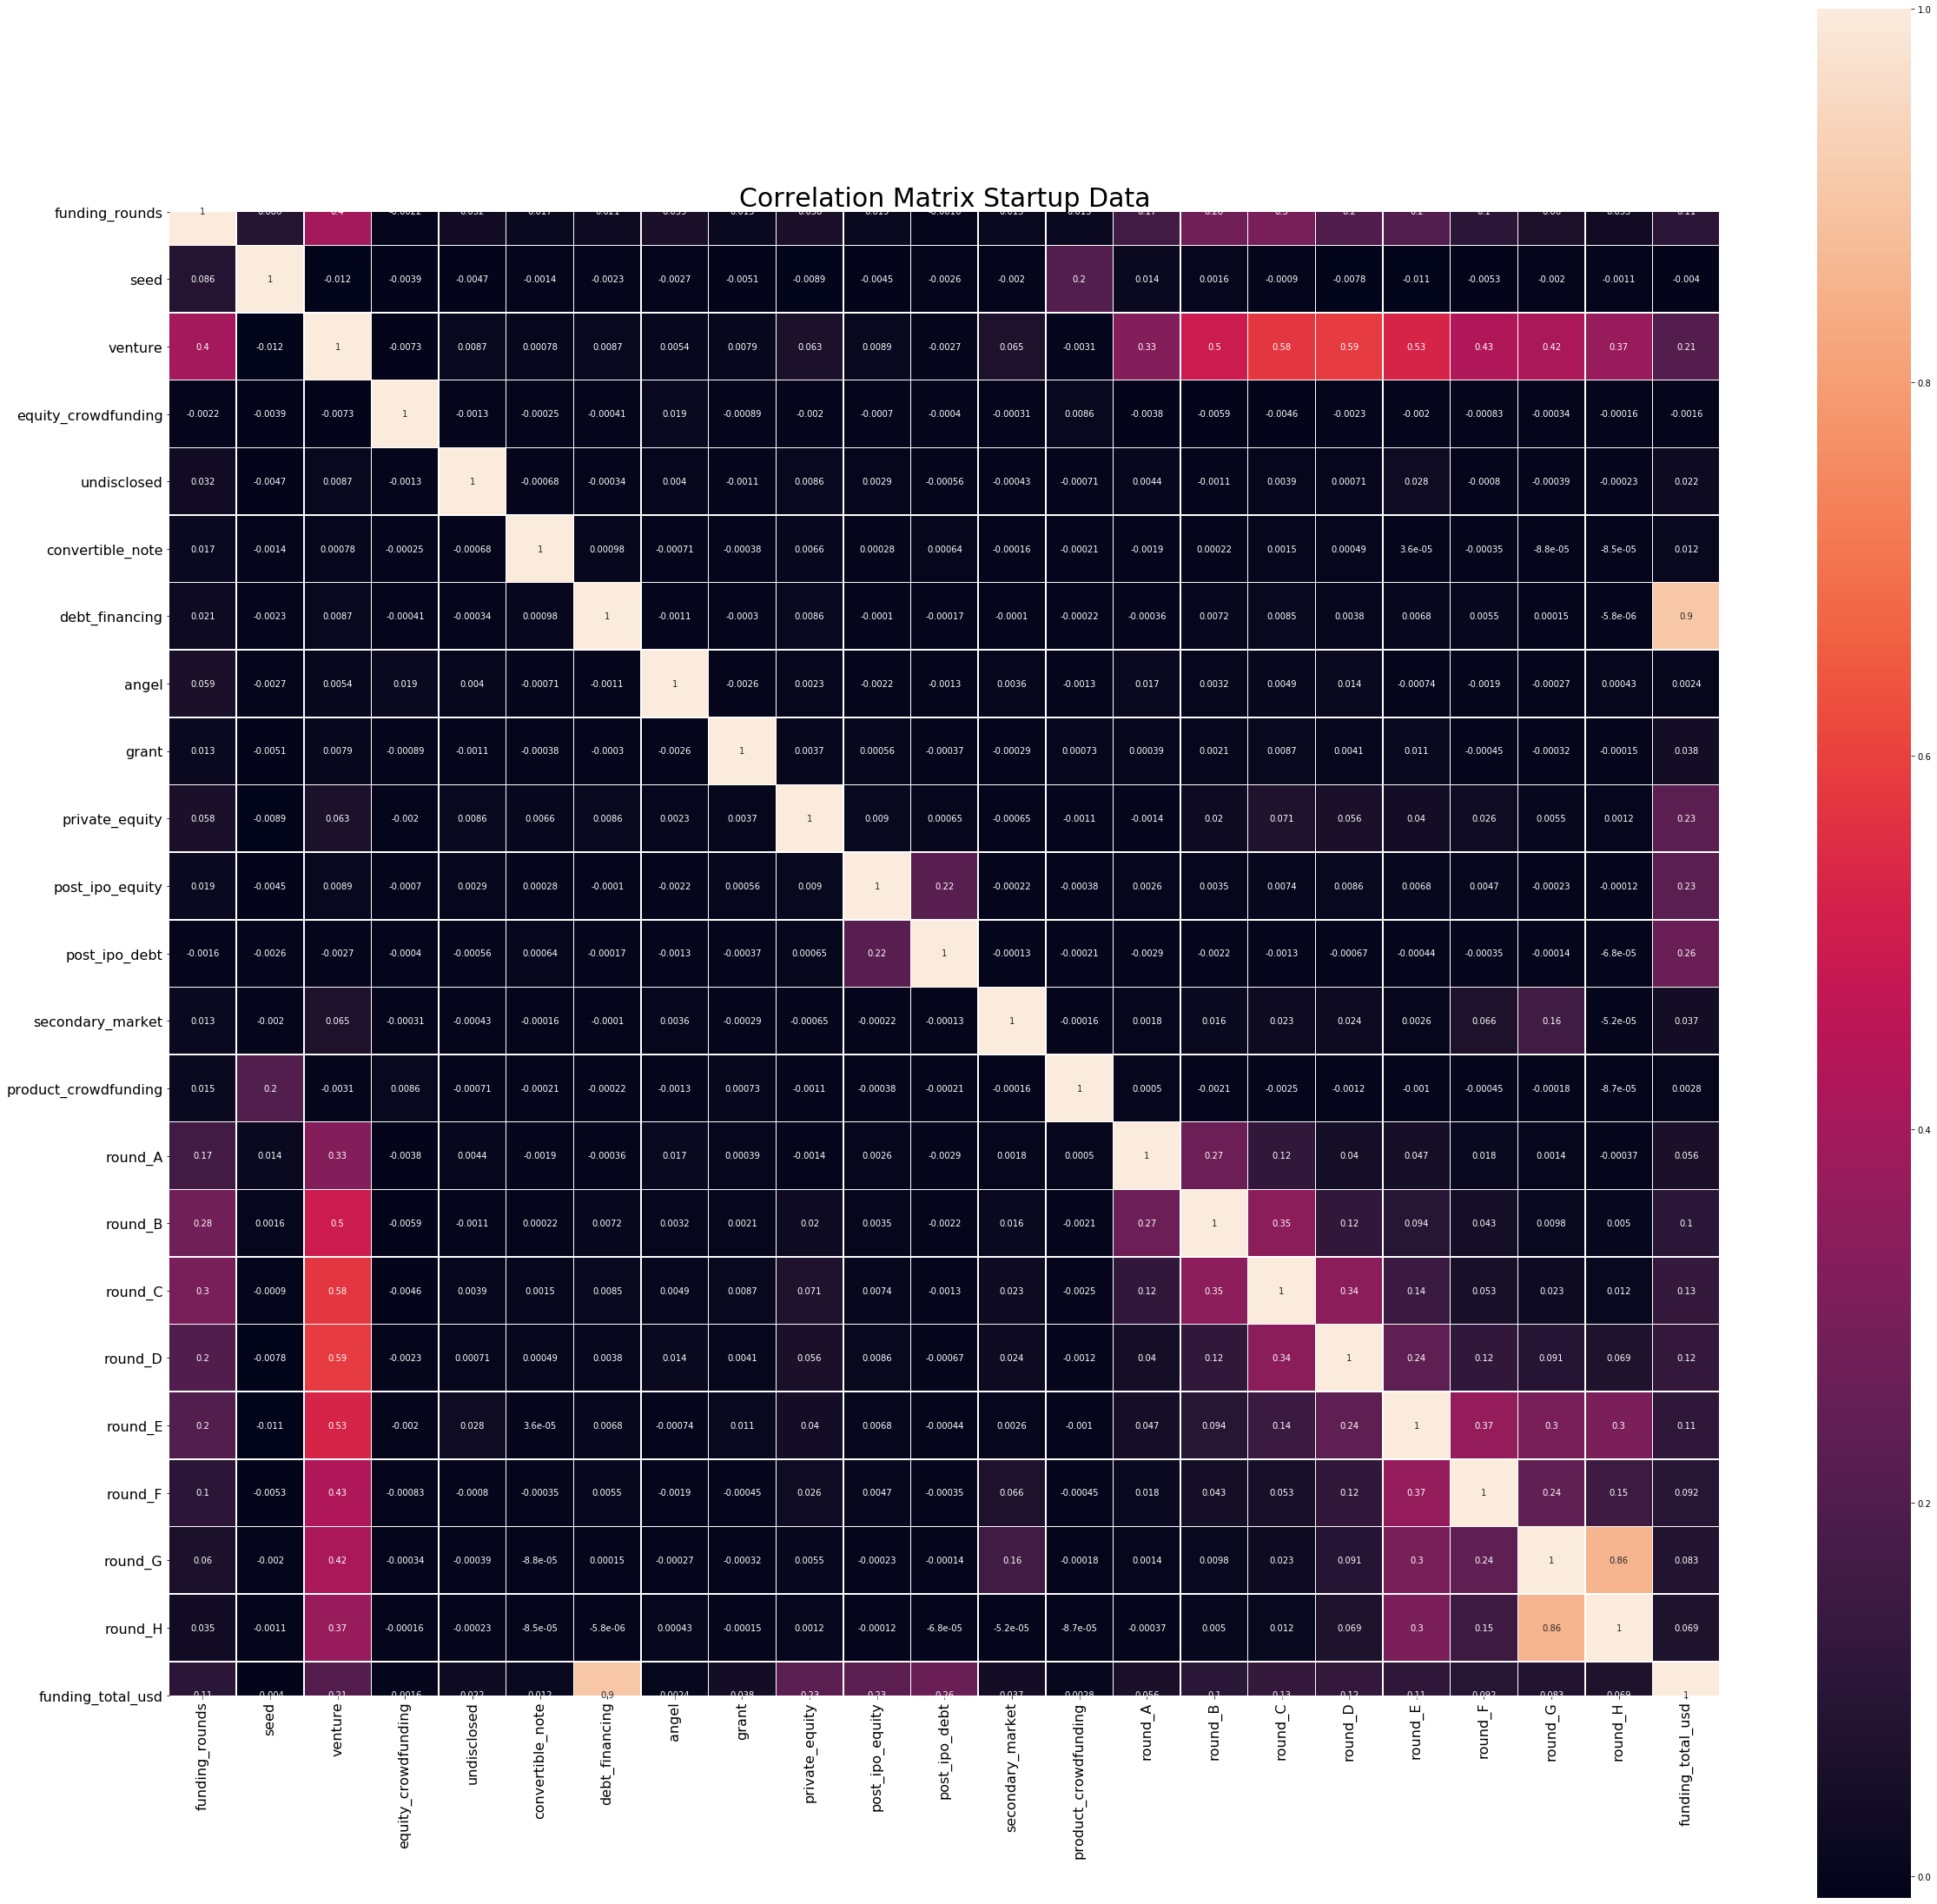

In [19]:
plt.figure(figsize = (40,40))
sns.heatmap(numeric_corr, square = True, annot = True, linewidths = 0.5)
plt.title("Correlation Matrix Startup Data", fontsize = 30)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

In [20]:
numeric_data['funding_rounds'].value_counts()

1.0     32039
2.0      9219
3.0      4026
4.0      1997
5.0      1001
6.0       560
7.0       252
8.0       152
9.0        84
10.0       43
11.0       35
12.0       12
13.0        8
15.0        4
14.0        4
16.0        1
18.0        1
Name: funding_rounds, dtype: int64

In [21]:
col_list = list(numeric_data.columns)
len(col_list)

23

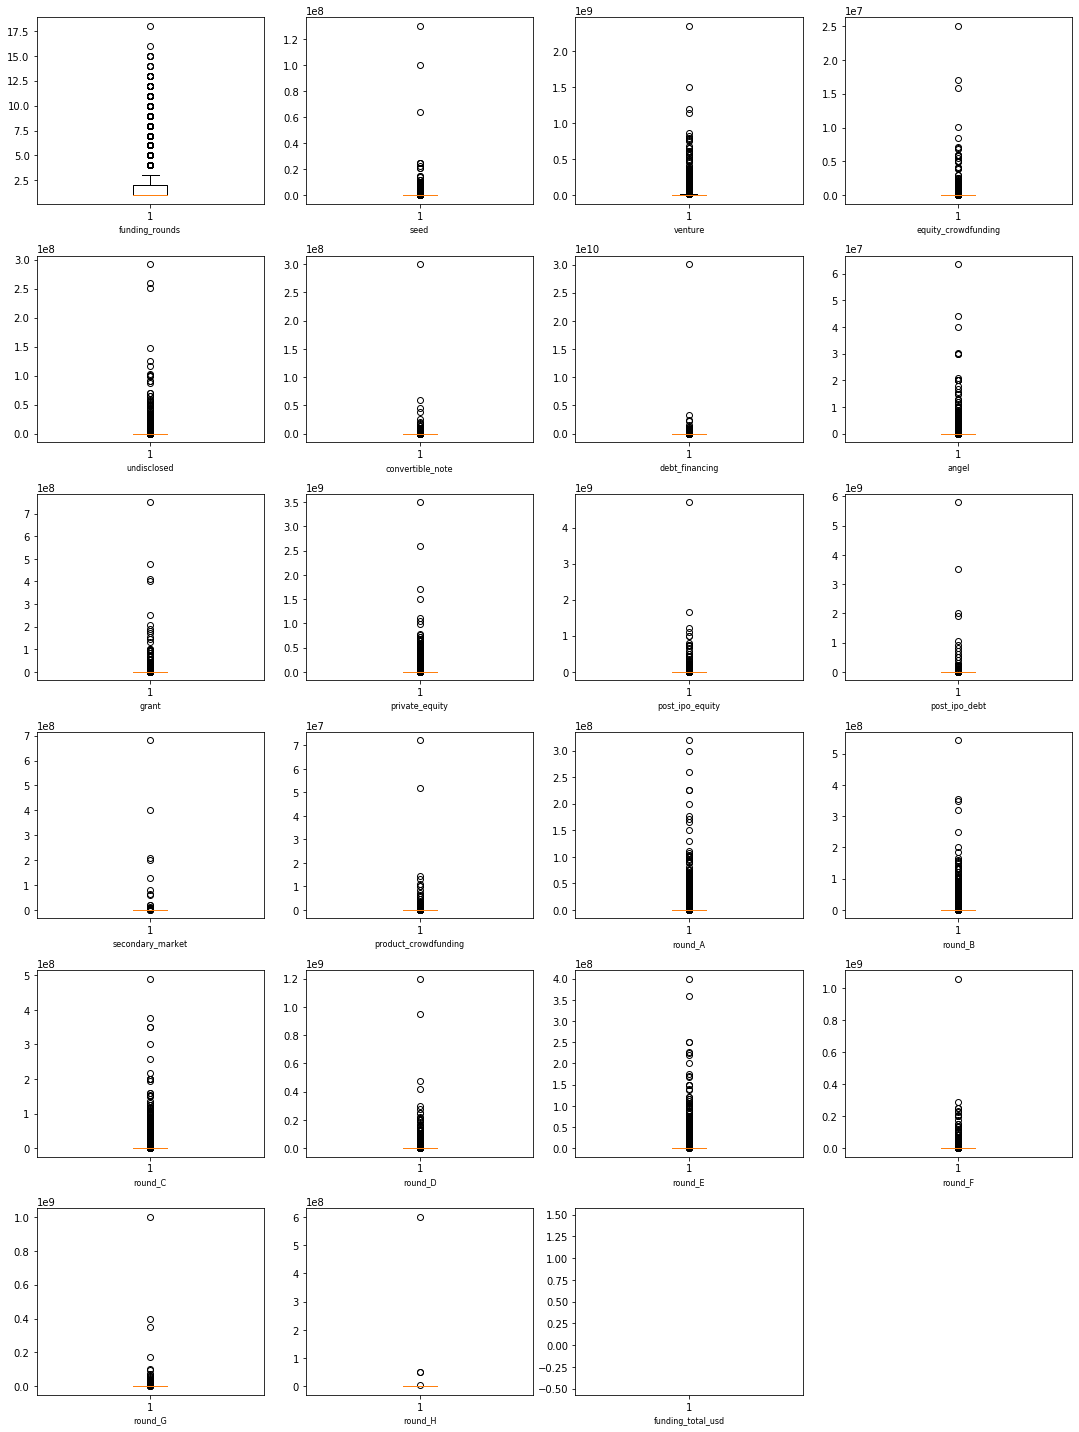

In [22]:
plt.figure(figsize = (15,20))
for index, col in enumerate(col_list):
    plt.subplot(6,4, index+1)
    plt.boxplot(numeric_data[col])
    plt.xlabel(col, fontsize = 8)
plt.tight_layout()

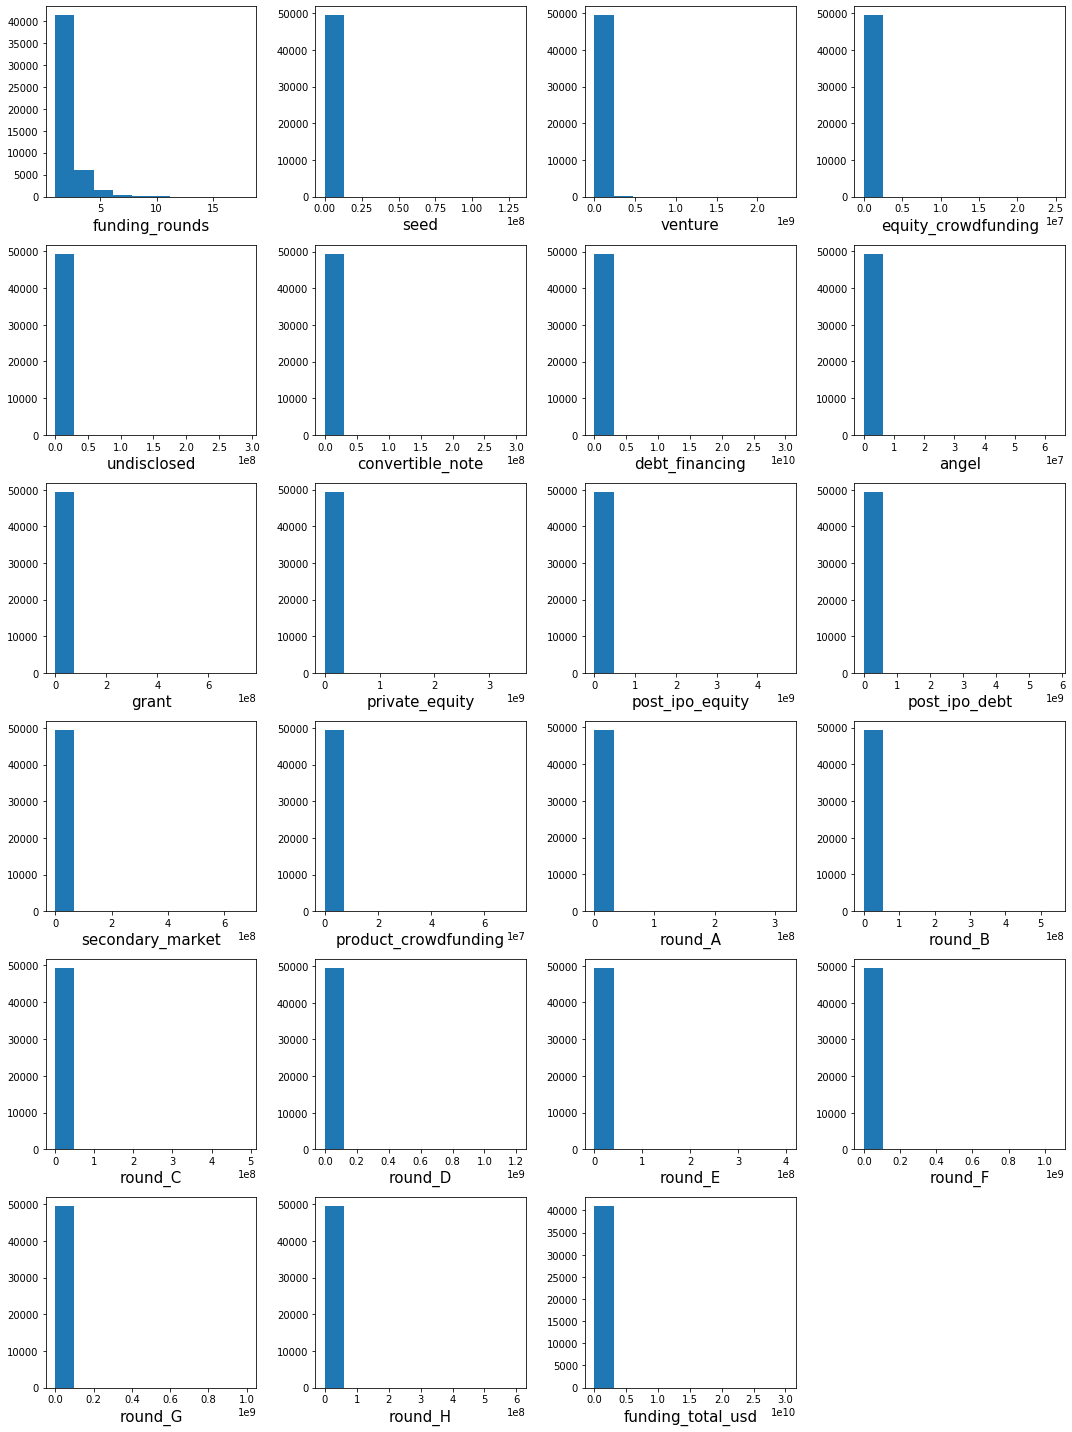

In [23]:
plt.figure(figsize = (15,20))
for index, col in enumerate(col_list):
    plt.subplot(6,4, index+1)
    plt.hist(numeric_data[col])
    plt.xlabel(col, fontsize = 15)
plt.tight_layout()

In [24]:
investments_df['status'].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

(array([3.2039e+04, 0.0000e+00, 9.2190e+03, 4.0260e+03, 1.9970e+03,
        1.0010e+03, 8.1200e+02, 2.7900e+02, 5.5000e+01, 1.0000e+01]),
 array([0.        , 0.28903718, 0.57807435, 0.86711153, 1.1561487 ,
        1.44518588, 1.73422305, 2.02326023, 2.31229741, 2.60133458,
        2.89037176]),
 <a list of 10 Patch objects>)

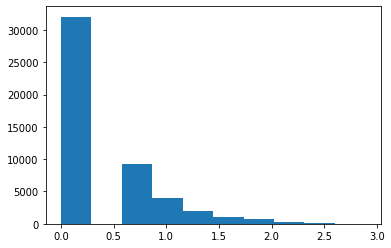

In [25]:
plt.hist(np.log(investments_df['funding_rounds']))

In [26]:
investments_df['funding_rounds'].value_counts()

1.0     32039
2.0      9219
3.0      4026
4.0      1997
5.0      1001
6.0       560
7.0       252
8.0       152
9.0        84
10.0       43
11.0       35
12.0       12
13.0        8
15.0        4
14.0        4
16.0        1
18.0        1
Name: funding_rounds, dtype: int64

In [27]:
investments_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_rounds,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,market
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,acquired,USA,NY,New York City,New York,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,News
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,operating,USA,CA,Los Angeles,Los Angeles,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,Games
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,operating,EST,NaN,Tallinn,Tallinn,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,Publishing
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,operating,GBR,NaN,London,London,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,Electronics
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,operating,USA,TX,Dallas,Fort Worth,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.0,Tourism


In [28]:
investments_df['seed'].mean()

217321.4965815769

### SEED:  In the Funding Life Cycle, once an idea has surpassed the concept stage the next stage of a new venture is known as the “Seed Stage”. During this early stage, entrepreneurs approach investors including friends, family, and angel investors to find financial support for their concept or product.

In [29]:
investments_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_rounds,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,market
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,acquired,USA,NY,New York City,New York,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,News
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,operating,USA,CA,Los Angeles,Los Angeles,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,Games
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,operating,EST,NaN,Tallinn,Tallinn,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,Publishing
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,operating,GBR,NaN,London,London,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,Electronics
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,operating,USA,TX,Dallas,Fort Worth,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.0,Tourism


In [30]:
investments_df['status'].isnull().sum()

1314

In [31]:
categorical_data.isnull().sum()

permalink               0
name                    1
homepage_url         3449
category_list        3961
status               1314
country_code         5273
state_code          19277
region               5273
city                 6116
founded_at          10884
founded_month       10956
founded_quarter     10956
first_funding_at        0
last_funding_at         0
market               3968
dtype: int64

### Founded_year, founded_month, founded_at , first_funding_at, last_funding_at, founded_quarter are dates. we have 6 columns with dates

In [32]:
categorical_data.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,founded_month,founded_quarter,first_funding_at,last_funding_at,market
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,acquired,USA,NY,New York City,New York,2012-06-01,2012-06,2012-Q2,2012-06-30,2012-06-30,News
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,operating,USA,CA,Los Angeles,Los Angeles,NaN,NaN,NaN,2010-06-04,2010-09-23,Games
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,operating,EST,NaN,Tallinn,Tallinn,2012-10-26,2012-10,2012-Q4,2012-08-09,2012-08-09,Publishing
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,operating,GBR,NaN,London,London,2011-04-01,2011-04,2011-Q2,2011-04-01,2011-04-01,Electronics
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,operating,USA,TX,Dallas,Fort Worth,2014-01-01,2014-01,2014-Q1,2014-08-17,2014-09-26,Tourism


In [33]:
investments_df.state_code =  investments_df[investments_df.loc[:, 'country_code']  == 'GBR']['state_code'].replace(np.nan, 'GBR')

In [34]:
investments_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_rounds,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,market
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,acquired,USA,NaN,New York City,New York,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,News
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,operating,USA,NaN,Los Angeles,Los Angeles,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,Games
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,operating,EST,NaN,Tallinn,Tallinn,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,Publishing
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,operating,GBR,GBR,London,London,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,Electronics
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,operating,USA,NaN,Dallas,Fort Worth,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.0,Tourism


In [35]:
investments_df['venture']

0               0.0
1         4000000.0
2               0.0
3               0.0
4               0.0
            ...    
49433           0.0
49434     1587301.0
49435           0.0
49436           0.0
49437    28000000.0
Name: venture, Length: 49438, dtype: float64

In [36]:
investments_df['status'].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

In [37]:
investments_df['founded_year'].min()

1902.0

In [38]:
categorical_data['country_code'].value_counts()

USA    28793
GBR     2642
CAN     1405
CHN     1239
DEU      968
       ...  
MAF        1
UZB        1
ALB        1
TTO        1
CIV        1
Name: country_code, Length: 115, dtype: int64

In [39]:
categorical_data['category_list'].nunique()

16675

In [56]:
## Dropping missing values in status column
investments_df.dropna(subset = ['status'], inplace = True)

In [57]:
## Founded_year, founded_month, founded_at , first_funding_at, last_funding_at, founded_quarter are dates. 
##we have 6 columns with dates

In [58]:
## Dropping the variables that have time for now
investments_df.drop(['founded_year', 'founded_month', 'founded_at', 'last_funding_at', 'founded_quarter'],
                   inplace = True, axis = 1)

In [104]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48124 entries, 0 to 49437
Data columns (total 24 columns):
funding_rounds          48124 non-null float64
seed                    48124 non-null float64
venture                 48124 non-null float64
equity_crowdfunding     48124 non-null float64
undisclosed             48124 non-null float64
convertible_note        48124 non-null float64
debt_financing          48124 non-null float64
angel                   48124 non-null float64
grant                   48124 non-null float64
private_equity          48124 non-null float64
post_ipo_equity         48124 non-null float64
post_ipo_debt           48124 non-null float64
secondary_market        48124 non-null float64
product_crowdfunding    48124 non-null float64
round_A                 48124 non-null float64
round_B                 48124 non-null float64
round_C                 48124 non-null float64
round_D                 48124 non-null float64
round_E                 48124 non-null float6

In [113]:
investments_df['funding_total_usd'].fillna(investments_df['funding_total_usd'].mean(), inplace = True)
investments_df['funding_total_usd'].isnull().sum()

0

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(investments_df['status'])

In [115]:
len(target)

48124

In [116]:
numeric_data = investments_df.select_dtypes(include = ['float', 'int'])

In [117]:
numeric_data['target_status'].value_counts()

2    41829
0     3692
1     2603
Name: target_status, dtype: int64

In [118]:
# Dealing with imbalanced dataset
# First shuffle the dataset
shuffled_df = numeric_data.sample(frac=1,random_state=4)
# Put all the "closed" class which is '1' in a separate dataset.
closed_df = shuffled_df.loc[shuffled_df['target_status'] == 1]
acquired_df = shuffled_df.loc[shuffled_df['target_status'] == 0].sample(n = 3000, random_state = 42)
#Randomly select 4000 observations from the operating (majority class)
operating_df = shuffled_df.loc[shuffled_df['target_status'] == 2].sample(n=3000,random_state=42)

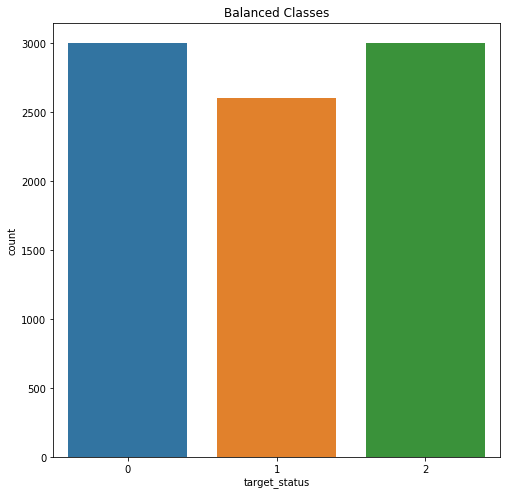

In [119]:
# Concatenate above 3 dataframes again
normalized_df = pd.concat([closed_df, acquired_df, operating_df])
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('target_status', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [124]:
X = normalized_df.loc[:, normalized_df.columns != 'target_status']
y = normalized_df[['target_status']]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [126]:
lr = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42)
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.4242541650523053

In [128]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X, y, cv=10)

array([0.46341463, 0.44831591, 0.45760743, 0.41744186, 0.42325581,
       0.45      , 0.4255814 , 0.44418605, 0.44186047, 0.4244186 ])

### Our Model Failed using both Logistic Regression and RandomForestClassifier. We may have to apply logarithmic transformation to numeric_data  and perform the analysis

In [138]:
numeric_data.describe()

,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,target_status
count,48124.000000,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,...,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,4.812400e+04,48124.000000
mean,1.700586,2.191042e+05,7.598091e+06,6.255879e+03,1.273428e+05,2.353346e+04,1.909246e+06,6.605675e+04,1.626366e+05,2.083347e+06,...,1.257983e+06,1.512301e+06,1.229792e+06,7.545214e+05,3.499801e+05,1.741948e+05,5.924533e+04,1.462056e+04,1.599667e+07,1.792474
std,1.298296,1.068580e+06,2.877746e+07,2.024335e+05,2.971224e+06,1.450830e+06,1.400643e+08,6.645587e+05,5.664512e+06,3.199324e+07,...,5.577529e+06,7.544910e+06,8.086419e+06,9.944356e+06,5.472720e+06,6.362813e+06,5.323528e+06,2.753707e+06,1.553741e+08,0.563829
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000
25%,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.178900e+05,2.000000
50%,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.859800e+06,2.000000
75%,2.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.599667e+07,2.000000
max,18.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,3.500000e+09,...,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08,3.007950e+10,2.000000


In [168]:
numeric_data = numeric_data.loc[:, numeric_data.columns != 'log_seed']

In [176]:
log_num_data = numeric_data.copy()

In [181]:
numeric_data.head()

,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,target_status
0,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,0
1,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,2
2,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,2
3,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,2
4,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.0,2


In [217]:
num_col = list(numeric_data.columns[1:23])
for i in range(len(num_col)):
    log_data = np.log(numeric_data[num_col]+1)
log_data.head()

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd
0,14.375127,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.375127
1,0.000000,15.201805,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.201805
2,10.596660,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.596660
3,14.220976,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.220976
4,0.000000,0.000000,11.002117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.002117


In [218]:
log_data['funding_rounds'] = numeric_data['funding_rounds']
log_data['target_status'] = numeric_data['target_status']

In [236]:
# Dealing with imbalanced dataset
# First shuffle the dataset
shuffled1_df = log_data.sample(frac=1,random_state=4)
# Put all the "closed" class which is '1' in a separate dataset.
closed1_df = shuffled1_df.loc[shuffled1_df['target_status'] == 1]
acquired1_df = shuffled1_df.loc[shuffled1_df['target_status'] == 0].sample(n = 3000, random_state = 42)
#Randomly select 4000 observations from the operating (majority class)
operating1_df = shuffled1_df.loc[shuffled1_df['target_status'] == 2].sample(n=3000,random_state=42)

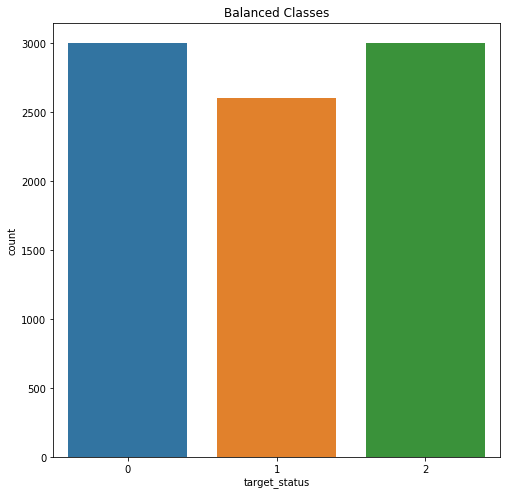

In [237]:
# Concatenate above 3 dataframes again
normalized1_df = pd.concat([closed1_df, acquired1_df, operating1_df])
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('target_status', data=normalized1_df)
plt.title('Balanced Classes')
plt.show()

In [238]:
col_list1 = list(log_data.columns)

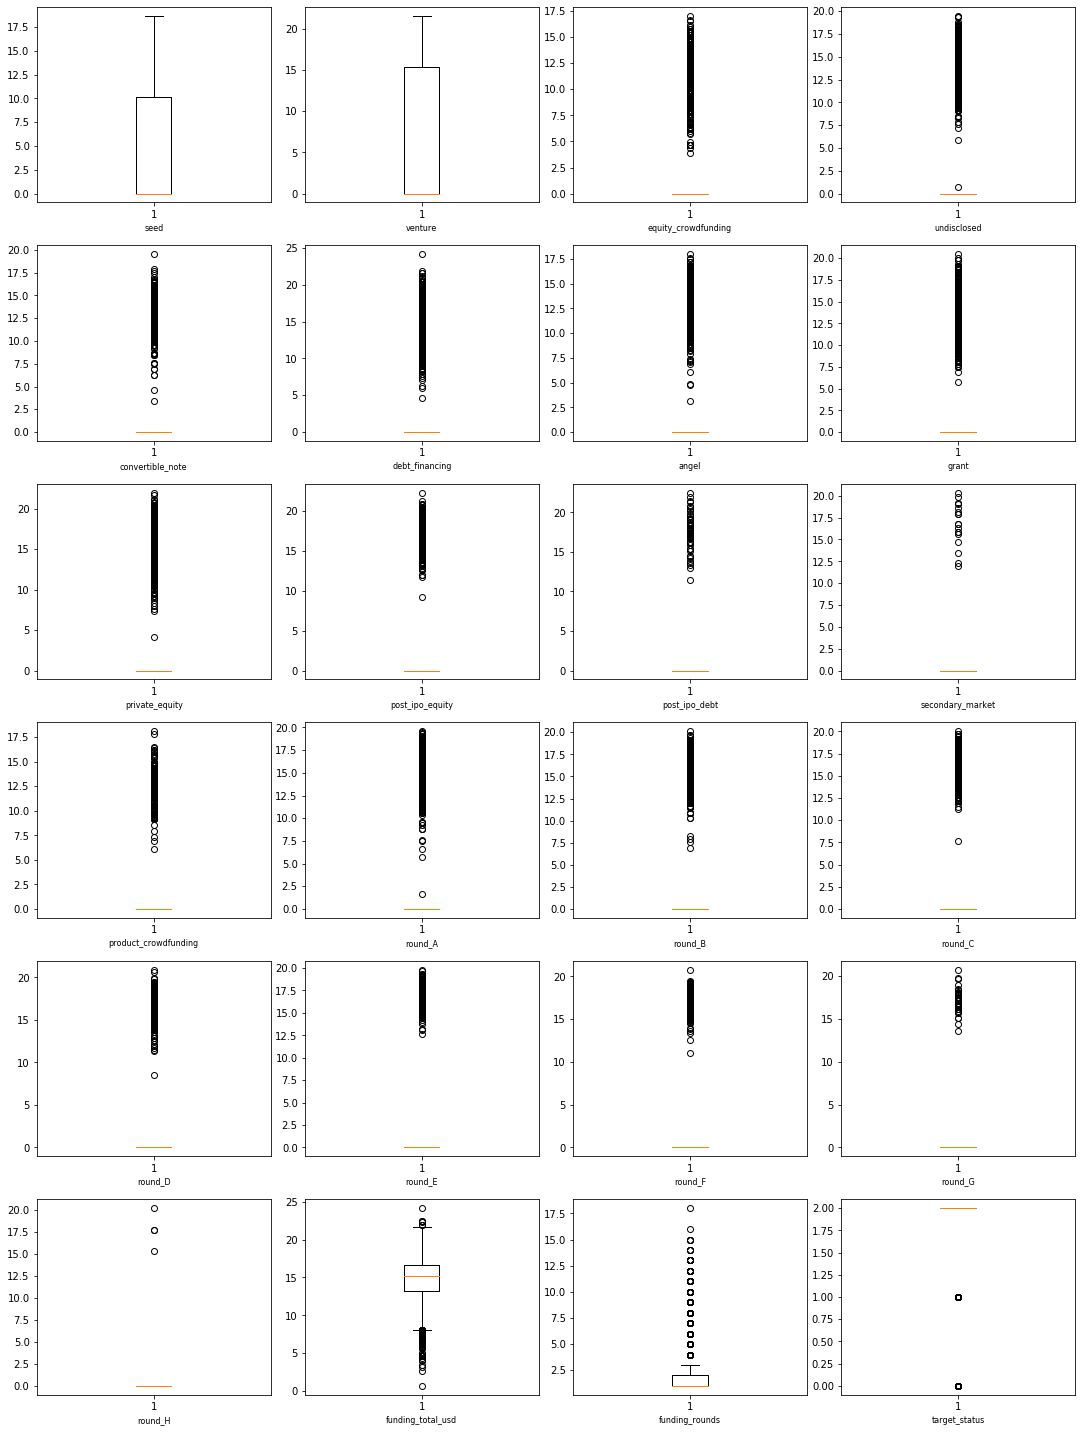

In [239]:
plt.figure(figsize = (15,20))
for index, col in enumerate(col_list1):
    plt.subplot(6,4, index+1)
    plt.boxplot(log_data[col])
    plt.xlabel(col, fontsize = 8)
plt.tight_layout()

In [240]:
numeric_data.columns[1:23]

Index(['seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'funding_total_usd'],
      dtype='object')

In [241]:
X = normalized_df.loc[:, normalized1_df.columns != 'target_status']
y = normalized1_df[['target_status']]

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [243]:
lr = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42)
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.4242541650523053

In [244]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X, y, cv=10)

array([0.45876887, 0.44599303, 0.44250871, 0.41162791, 0.42674419,
       0.46511628, 0.43372093, 0.4372093 , 0.44186047, 0.43837209])

In [226]:
log_data.describe()

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,funding_rounds,target_status
count,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,...,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000,48124.000000
mean,3.485757,7.270287,0.119844,0.266329,0.146007,1.213561,0.831161,0.292615,0.453161,0.089570,...,1.776754,0.956432,0.440348,0.179184,0.060049,0.012076,0.001475,14.741983,1.700586,1.792474
std,5.671018,7.766936,1.176106,1.924378,1.379769,4.008415,3.198170,1.975749,2.726844,1.232887,...,5.032805,3.851723,2.674167,1.729416,1.008856,0.455880,0.162556,2.291047,1.298296,0.563829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.157520,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.166126,1.000000,2.000000
75%,10.126671,15.424949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.587891,2.000000,2.000000
max,18.683045,21.578107,17.034386,19.493746,19.519293,24.127110,17.967971,20.436250,21.976029,22.270828,...,20.110777,20.009916,20.905587,19.806975,20.781535,20.723266,20.212440,24.127110,18.000000,2.000000


In [227]:
from scipy.stats.mstats import winsorize
wins_crowdfunding = winsorize(log_data['equity_crowdfunding'], (0,0.1))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a21f35a20>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2a8b5b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a36ff0f28>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2fcedc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2fcedcc0>],
 'means': []}

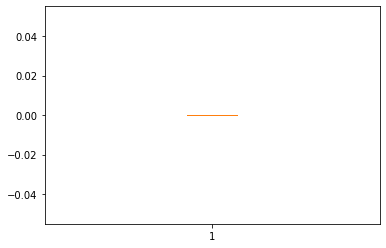

In [228]:
plt.boxplot(wins_crowdfunding)

In [229]:
max(wins_crowdfunding)

0.0

In [230]:
num_col = list(numeric_data.columns[1:23])
for i in range(len(num_col)):
    sqrt_data = np.sqrt(numeric_data[num_col]+1)
sqrt_data.head()

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd
0,1322.876033,1.00000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1322.876033
1,1.000000,2000.00025,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2000.000250
2,200.002500,1.00000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.002500
3,1224.745280,1.00000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1224.745280
4,1.000000,1.00000,244.951016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,244.951016


In [246]:
sqrt_data['funding_rounds'] = numeric_data['funding_rounds']
sqrt_data['target_status'] = numeric_data['target_status']

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_total_usd,funding_rounds
0,1322.876033,1.00000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1322.876033,1.0
1,1.000000,2000.00025,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2000.000250,2.0
2,200.002500,1.00000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.002500,1.0
3,1224.745280,1.00000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1224.745280,1.0
4,1.000000,1.00000,244.951016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,244.951016,2.0


In [247]:
# Dealing with imbalanced dataset
# First shuffle the dataset
shuffled_df1 = sqrt_data.sample(frac=1,random_state=4)
# Put all the "closed" class which is '1' in a separate dataset.
closed_df1 = shuffled_df1.loc[shuffled_df1['target_status'] == 1]
acquired_df1 = shuffled_df1.loc[shuffled_df1['target_status'] == 0].sample(n = 3000, random_state = 42)
#Randomly select 4000 observations from the operating (majority class)
operating_df1 = shuffled_df1.loc[shuffled_df1['target_status'] == 2].sample(n=3000,random_state=42)

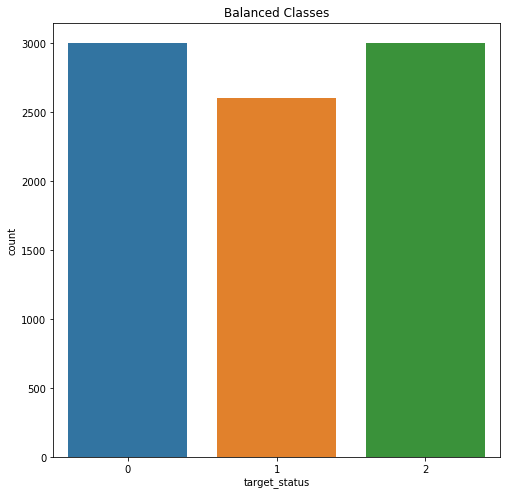

In [248]:
# Concatenate above 3 dataframes again
normalized_df1 = pd.concat([closed_df1, acquired_df1, operating_df1])
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('target_status', data=normalized_df1)
plt.title('Balanced Classes')
plt.show()

In [249]:
X = normalized_df1.loc[:, normalized_df1.columns != 'target_status']
y = normalized_df1[['target_status']]

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [251]:
lr = LogisticRegression(solver='lbfgs', penalty ='none', max_iter = 1000, random_state = 42)
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.4509879891514917

In [253]:
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X, y, cv=5)

array([0.44857641, 0.4363742 , 0.45322487, 0.43023256, 0.42790698])

In [265]:
categorical_data.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,founded_month,founded_quarter,first_funding_at,last_funding_at,market
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,acquired,USA,NY,New York City,New York,2012-06-01,2012-06-01,2012-04-01,NaT,2012-06-30,News
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,operating,USA,CA,Los Angeles,Los Angeles,NaN,NaT,NaT,NaT,2010-09-23,Games
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,operating,EST,NaN,Tallinn,Tallinn,2012-10-26,2012-10-01,2012-10-01,NaT,2012-08-09,Publishing
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,operating,GBR,NaN,London,London,2011-04-01,2011-04-01,2011-04-01,NaT,2011-04-01,Electronics
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,operating,USA,TX,Dallas,Fort Worth,2014-01-01,2014-01-01,2014-01-01,NaT,2014-09-26,Tourism


In [ ]:
investments_df.state_code =  investments_df[investments_df.loc[:, 'country_code']  == 'GBR']['state_code'].replace(np.nan, 'GBR')

In [267]:
categorical_data['first_funding_at'] = categorical_data[categorical_data.loc[:, 'first_funding_at'] == '26-11-14'].replace('26-11-14', '2014-11-26')

In [268]:
categorical_data['last_funding_at'] = categorical_data[categorical_data.loc[:, 'last_funding_at'] == '26-11-14'].replace('26-11-14', '2014-11-26')

In [ ]:
categorical_data['founded_month'] = pd.to_datetime(categorical_data['founded_month'])
categorical_data['founded_quarter'] = pd.to_datetime(categorical_data['founded_quarter'])
categorical_data['first_funding_at'] = pd.to_datetime(categorical_data['first_funding_at'])
categorical_data['last_funding_at'] = pd.to_datetime(categorical_data['last_funding_at'])



In [272]:
categorical_data['first_funding_at'] = investments_df['first_funding_at']
categorical_data['last_funding_at'] = investments_df1['last_funding_at']

In [273]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49438 entries, 0 to 49437
Data columns (total 15 columns):
permalink           49438 non-null object
name                49437 non-null object
homepage_url        45989 non-null object
category_list       45477 non-null object
status              48124 non-null object
country_code        44165 non-null object
state_code          30161 non-null object
region              44165 non-null object
city                43322 non-null object
founded_at          38554 non-null object
founded_month       38482 non-null datetime64[ns]
founded_quarter     38482 non-null datetime64[ns]
first_funding_at    48124 non-null object
last_funding_at     49438 non-null object
market              45470 non-null object
dtypes: datetime64[ns](2), object(13)
memory usage: 7.3+ MB


In [278]:
categorical_data['first_funding_at'] = pd.to_datetime(categorical_data['first_funding_at'], errors = 'coerce')
categorical_data['last_funding_at'] = pd.to_datetime(categorical_data['last_funding_at'], errors = 'coerce')

In [282]:
categorical_data['founded_at'] = pd.to_datetime(categorical_data['founded_at'], errors = 'coerce')

In [283]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49438 entries, 0 to 49437
Data columns (total 15 columns):
permalink           49438 non-null object
name                49437 non-null object
homepage_url        45989 non-null object
category_list       45477 non-null object
status              48124 non-null object
country_code        44165 non-null object
state_code          30161 non-null object
region              44165 non-null object
city                43322 non-null object
founded_at          38553 non-null datetime64[ns]
founded_month       38482 non-null datetime64[ns]
founded_quarter     38482 non-null datetime64[ns]
first_funding_at    48114 non-null datetime64[ns]
last_funding_at     49432 non-null datetime64[ns]
market              45470 non-null object
dtypes: datetime64[ns](5), object(10)
memory usage: 7.3+ MB


In [286]:
duration = categorical_data['founded_at'] - categorical_data['first_funding_at']

In [290]:
numeric_data['duration'] = duration

In [300]:
numeric_data['duration'] = duration

In [301]:
numeric_data['duration'] = numeric_data['duration'].fillna(0)

In [308]:
categorical_data['market'].isnull().sum()

3968

In [322]:
categorical_data['category_list'].unique()

array(['|Entertainment|Politics|Social Media|News|', '|Games|',
       '|Publishing|Education|', ...,
       '|Technology|Facebook Applications|Networking|Games|',
       '|Analytics|Gamification|Developer APIs|iOS|Android|Education|',
       '|Web Development|Advertising|Wireless|Mobile|'], dtype=object)

In [323]:
categorical_data['market'] = categorical_data['market'].fillna('missing')

In [360]:
numeric_data['duration']

0          -29 days +00:00:00
1                           0
2            78 days 00:00:00
3             0 days 00:00:00
4         -228 days +00:00:00
                 ...         
49433     -420 days +00:00:00
49434                       0
49435       194 days 00:00:00
49436                       0
49437    -3439 days +00:00:00
Name: duration, Length: 48124, dtype: object

In [385]:
duration1 = categorical_data['last_funding_at'] - categorical_data['first_funding_at']
duration1.replace('days', '')

0          0 days
1        111 days
2          0 days
3          0 days
4         40 days
           ...   
49433      0 days
49434      0 days
49435   1044 days
49436      0 days
49437   1768 days
Length: 49438, dtype: timedelta64[ns]

In [404]:
duration1

0          0 days
1        111 days
2          0 days
3          0 days
4         40 days
           ...   
49433      0 days
49434      0 days
49435   1044 days
49436      0 days
49437   1768 days
Length: 49438, dtype: timedelta64[ns]